# DBSCAN

In [ ]:
import cv2
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader , TensorDataset 
from scipy import ndimage
from scipy.ndimage import gaussian_filter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from torchsummary import summary

*Dataset from Innopolis University Machine Learning course.

In [ ]:
data = pd.read_csv("clustering_data/trainset.csv") 

In [ ]:
test_data = pd.read_csv("clustering_data/testset.csv")

# Train and Test datasets Label Encoding

In [ ]:
# all proto unique values
# Label Encoding from scratch for train and test datasets
proto_arr = data.proto.unique()
proto_test_arr = test_data.proto.unique()
proto_test_arr = list(proto_test_arr)
proto_arr = list(proto_arr)
all_proto = proto_arr+proto_test_arr # all values from train and test for state
all_proto = set(all_proto) # get unique values
all_proto = list(all_proto)

#proto LE in train_ds
proto_dict = {}
idx = 0
for i in all_proto:
    proto_dict[i] = idx
    idx+=1
    
# encoding
proto_LE_arr = []
for i in data.proto:
    proto_LE_arr.append(proto_dict[i])
data['proto_LE'] = proto_LE_arr
data = data.drop(['proto'],axis = 1)

# proto LE in test_ds
proto_LE_arr = []
for i in test_data.proto:
    proto_LE_arr.append(proto_dict[i])
test_data['proto_LE'] = proto_LE_arr
test_data = test_data.drop(['proto'],axis = 1)

In [ ]:
#all service unique values
# Label Encoding from scratch for train and test datasets
service_arr = data.service.unique()
service_test_arr = test_data.service.unique()
service_test_arr = list(service_test_arr)
service_arr = list(service_arr)
all_service = service_arr+service_test_arr # all values from train and test for state
all_service = set(all_service) # get unique values
all_service = list(all_service)

# service LE train_ds
service_dict = {}
idx = 0
for i in all_service:
    service_dict[i] = idx
    idx+=1
    
# encoding
service_LE_arr = []
for i in data.service:
    service_LE_arr.append(service_dict[i])
data['service_LE'] = service_LE_arr
data = data.drop(['service'],axis = 1)

# service LE test_ds
service_LE_arr = []
for i in test_data.service:
    service_LE_arr.append(service_dict[i])
test_data['service_LE'] = service_LE_arr
test_data = test_data.drop(['service'],axis = 1)

In [ ]:
#all state unique values
# Label Encoding from scratch for train and test datasets
state_arr = data.state.unique()
state_test_arr = test_data.state.unique()
state_test_arr = list(state_test_arr)
state_arr = list(state_arr)
all_state = state_arr+state_test_arr # all values from train and test for state
all_state = set(all_state)# get unique values
all_state = list(all_state)

# state LE train_ds
state_dict = {}
idx = 0
for i in all_state:
    state_dict[i] = idx
    idx+=1

# encoding    
state_LE_arr = []
for i in data.state:
    state_LE_arr.append(state_dict[i])
data['state_LE'] = state_LE_arr
data = data.drop(['state'],axis = 1)

# state LE test_ds
state_LE_arr = []
for i in test_data.state:
    state_LE_arr.append(state_dict[i])
test_data['state_LE'] = state_LE_arr
test_data = test_data.drop(['state'],axis = 1)

# Scaling and DBSCAN

In [ ]:
# MinMax scaling, all values will be between 0 and 1
scaler = preprocessing.MinMaxScaler()
scaled_data = scaler.fit_transform(test_data)
test_data = pd.DataFrame(scaled_data)

In [ ]:
# reduce dimension from 40+ to 2 
pca = PCA(n_components=2)
pca_test_data = pca.fit_transform(test_data)

In [ ]:
epsi = [0.3, 0.4, 0.5, 0.6, 0.7]
for i in epsi:
    db = DBSCAN(eps=i)
    y_pred = db.fit_predict(test_data)
    print("silhouette score for eps value "+str(i)+" is: "+str(metrics.silhouette_score(test_data, y_pred)))

silhouette score for eps value 0.3 is: 0.2760685531846384
silhouette score for eps value 0.4 is: 0.2733685483050113
silhouette score for eps value 0.5 is: 0.3245040517876426
silhouette score for eps value 0.6 is: 0.29149223122438706
silhouette score for eps value 0.7 is: 0.31134625625986573


According to silhouette results, eps value 0.5 is the best, so we will take this one

In [ ]:
# MinMax scaling, all values will be between 0 and 1
scaler = preprocessing.MinMaxScaler()
scaled_pca_test_data = scaler.fit_transform(pca_test_data)
scaled_pca_test_data = pd.DataFrame(scaled_pca_test_data)

In [ ]:
db = DBSCAN(eps=0.5)
y_pred = db.fit_predict(test_data)

Text(0.5, 1.0, 'DBSCAN')

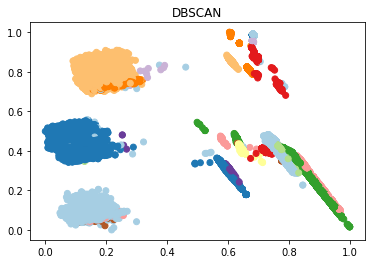

In [ ]:
plt.scatter(scaled_pca_test_data[0],scaled_pca_test_data[1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")

In [ ]:
pd.DataFrame(y_pred).value_counts()

 2     18800
 10    17682
 0     14410
 21    11909
 3      9897
 23     3039
 5      1574
 22     1515
 1       818
 16      553
 6       404
 9       290
 26      267
 19      146
 13      107
-1       106
 11      105
 18      104
 34      101
 30       74
 24       61
 29       60
 17       58
 25       38
 14       36
 4        34
 8        24
 38       15
 31       14
 12       12
 32       10
 20       10
 27        8
 35        7
 40        7
 28        6
 37        6
 39        6
 15        5
 36        5
 7         5
 33        4
dtype: int64

So, we have 40 clusters, and 1 cluster (-1) which is outliers. Generally we can treat all little clusters as outliers, but we used PCA and reduced dimensions, so in plotted image seems that all of them in one dimensions, but some clusters located in different dimensions. In one dimension can be evven 10 poits...  

In [ ]:
scaled_pca_test_data[2] = y_pred

In [ ]:
# outliers
idx_arr = []
for i in range(len(y_pred)):
    if y_pred[i] == -1:
        idx_arr.append(i)

<Figure size 1440x864 with 0 Axes>

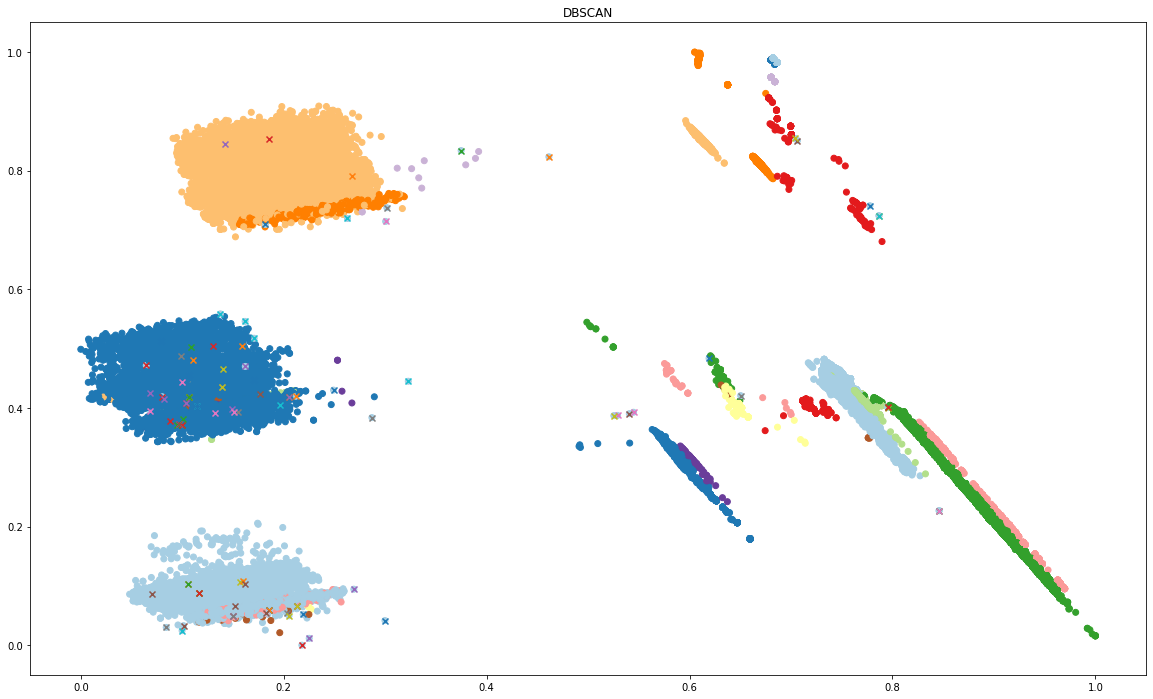

In [ ]:
plt.figure(figsize=(20,12))
fig, axis = plt.subplots(figsize=(20,12))
axis.title.set_text("DBSCAN")
axis.scatter(scaled_pca_test_data[0], scaled_pca_test_data[1],c=y_pred, cmap='Paired')
for i in idx_arr:
    axis.scatter(scaled_pca_test_data[0][i], scaled_pca_test_data[1][i], marker='x')

In general DBSCAN model divides to cluster and find outliers. All outliers assigns to cluster -1. In this image I drew "x" on ouliers. Also we have multiple dimensions, because you can see in big clusters located few dots with different colors. I fitted only on test dataset, because it is unsupervised learning (clustering independet towards train fit) and DBSCAN fail on train dataset (Memory Error).   

# References

https://stackoverflow.com/a/30230738 

https://stackoverflow.com/a/451580

https://stackoverflow.com/a/69056163

https://stackoverflow.com/a/66907684

https://stackoverflow.com/a/61657036